In [ ]:
from paths import heat_out_merra2
import numpy as np
import xarray
from scipy.stats.stats import pearsonr

exp_num = "3136"
merra = xarray.open_dataset([path for path in heat_out_merra2() if exp_num in path and "tx" in path][0])["HWF_tx9pct"].dt.days


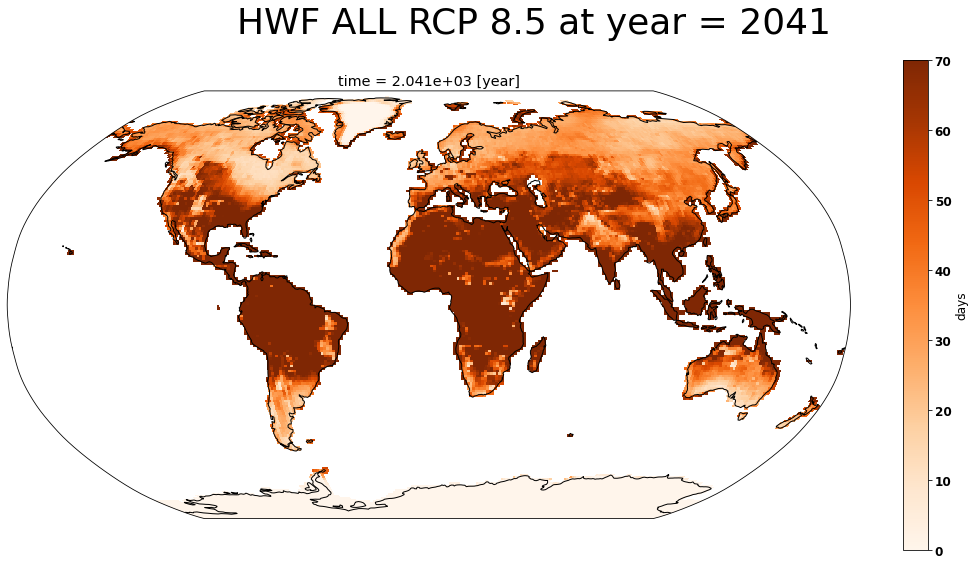

In [196]:
from scipy.signal import correlate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib import rc
from matplotlib import animation
from IPython.display import HTML
import xarray
from paths import heat_out_trefht_tmin_members_1920_1950_CONTROL as tmin

exp_num = "3136"

land_mask = xarray.open_dataset("../data/land_mask.nc")["__xarray_dataarray_variable__"].load()

all_min, xghg_min, xaer_min = tmin()
all_data = xarray.open_mfdataset([path for path in all_min if exp_num in path], concat_dim="member", combine="nested")[f"HWF_tn90"].dt.days.sel(time=slice(1920, 2079)).where(land_mask>0).mean(dim="member")
pop_data = xarray.open_dataset("/projects/dgs/persad_research/heat_research/data/population/population_histsoc_30arcmin_annual_1901_2020.nc", decode_times=False)["popc"]

rc('font', **{'weight': 'bold', 'size': 12})
f, ax = plt.subplots(1, 1, figsize=(15, 8), facecolor='w', subplot_kw={'projection': ccrs.Robinson()})
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

f.year = 1921

vmax = 70
cmap = "Oranges"

def init():
    all_data.sel(time=year).plot(ax=ax, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
    f.suptitle(f"HWF ALL RCP 8.5 at year = {f.year}", fontsize=36)
    ax.coastlines()
    return []

def animate(dt):
    ax.cla()
    if f.year < all_data.time.max():
        f.year = f.year + 1
    all_data.sel(time=f.year).plot(ax=ax, add_colorbar=False, vmax=vmax, cmap=cmap, transform=ccrs.PlateCarree())
    ax.coastlines()
    f.suptitle(f"HWF ALL RCP 8.5 at year = {f.year}", fontsize=36)
    f.tight_layout()
    return []

anim = animation.FuncAnimation(f, animate, init_func=init, frames=120, interval=(200), blit=False)
HTML(anim.to_html5_video())

In [197]:
year

1920

In [175]:
import numpy as np
pop_data.values = np.add(pop_data.sel(time=1920-1900).values, np.ones(pop_data.sel(time=1920-1900).shape))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


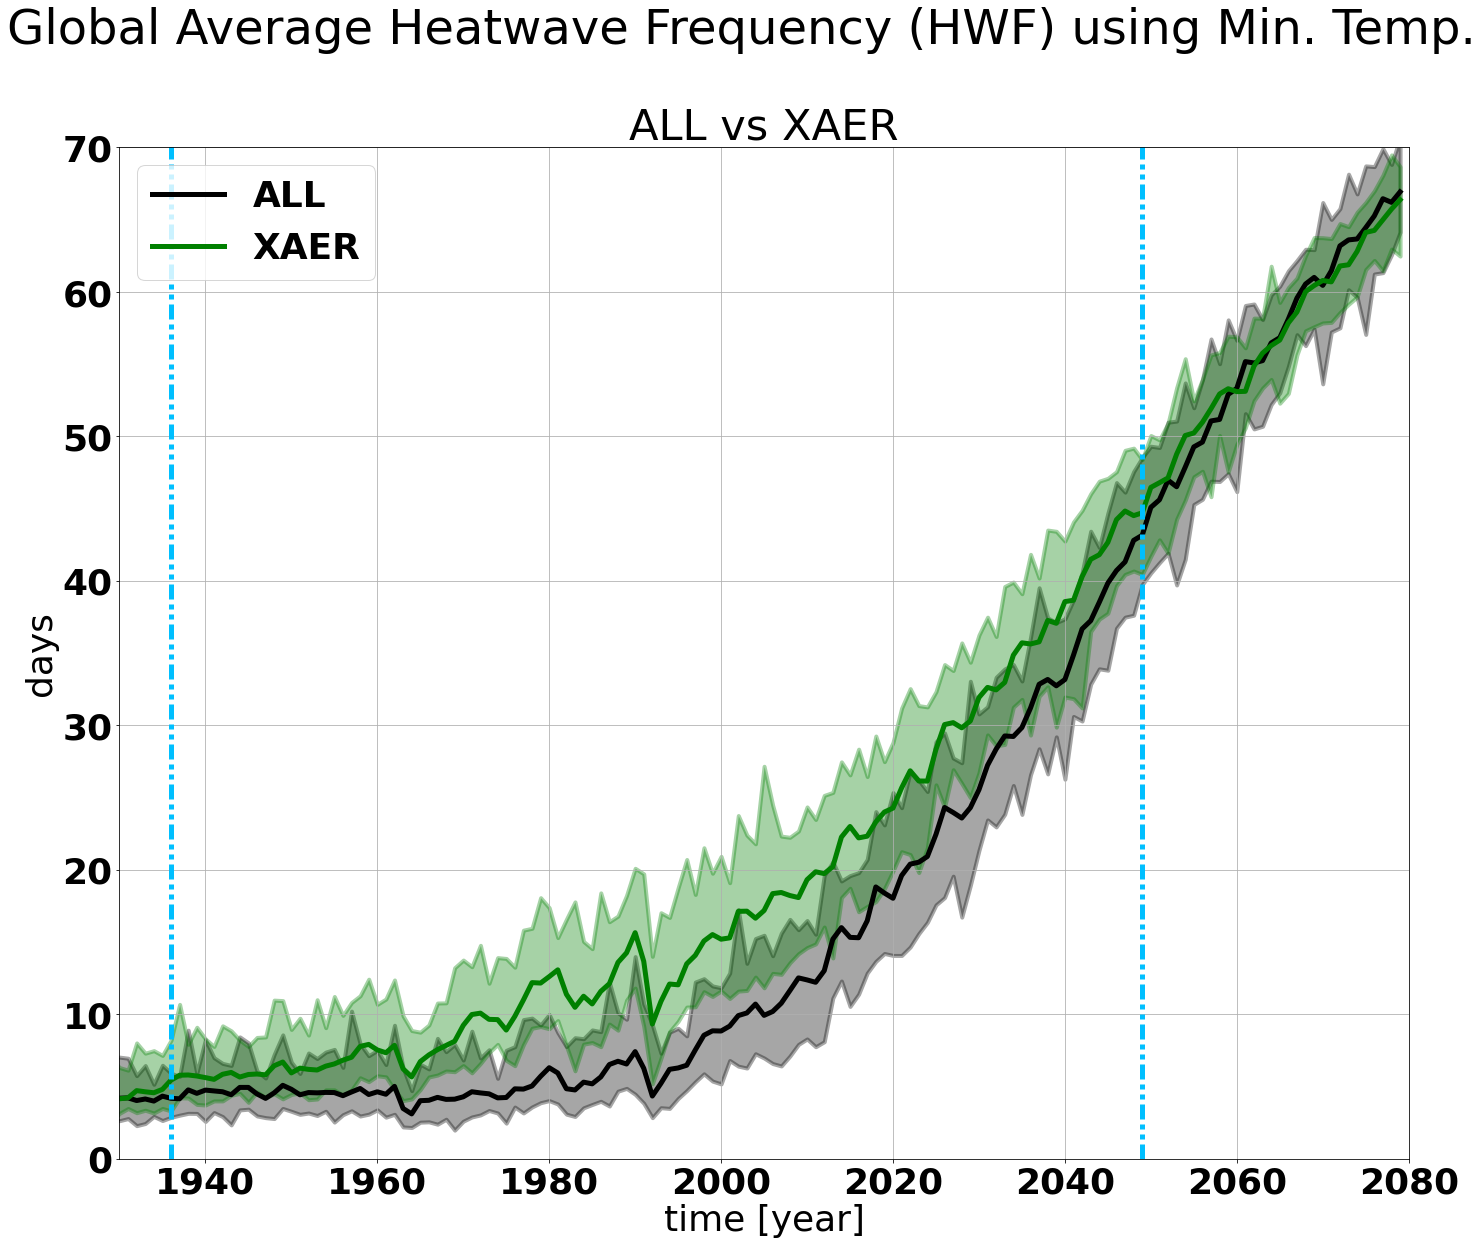

In [12]:
from paths import heat_out_trefht_tmin_members_1920_1950_CONTROL as tmin, heat_out_trefht_tmax_members_1920_1950_CONTROL as tmax
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors
from matplotlib import rc
from regionmask.defined_regions import ar6

exp_num = "3136"

all_min, xghg_min, xaer_min = tmin()

#Mask for land
land_mask = xarray.open_dataset("../data/land_mask.nc")["__xarray_dataarray_variable__"].load()

all_min_hwf = xarray.open_mfdataset([path for path in all_min if exp_num in path], concat_dim="member", combine="nested")[f"HWF_tn90"].dt.days.sel(time=slice(1920, 2079)).where(land_mask>0).load().mean(dim="lat").mean(dim="lon")
xaer_min_hwf = xarray.open_mfdataset([path for path in xaer_min if exp_num in path], concat_dim="member", combine="nested")[f"HWF_tn90"].dt.days.sel(time=slice(1920, 2079)).where(land_mask>0).load().mean(dim="lat").mean(dim="lon")

rc('font', **{'family': 'normal', 'weight': 'bold', 'size': 36})
f, ax1 = plt.subplots(1, 1, figsize=(21, 18), facecolor='w')
f.suptitle(f"Global Average Heatwave Frequency (HWF) using Min. Temp.", fontsize=48)
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

mean_lw = 5
mean_bls = "-"
span_a = 0.3
bls_a = 0.35
reg_pt = 14.0
all_c = "black"
xaer_c = "green"
bls_lw = 4

all_min_hwf.mean(dim="member").plot(ax=ax1, linewidth=mean_lw, color=all_c, label="ALL")
xaer_min_hwf.mean(dim="member").plot(ax=ax1, linewidth=mean_lw, color=xaer_c, label="XAER")
ax1.fill_between(all_min_hwf.time, all_min_hwf.min(dim="member"), all_min_hwf.max(dim="member"), color=all_c, linestyle=mean_bls, linewidth=bls_lw, alpha=bls_a)
ax1.fill_between(xaer_min_hwf.time, xaer_min_hwf.min(dim="member"), xaer_min_hwf.max(dim="member"), color=xaer_c, linestyle=mean_bls, linewidth=bls_lw, alpha=bls_a)
ax1.grid(axis='both')
ax1.legend(loc='upper left')
ax1.set_title("ALL vs XAER")

aer = (all_min_hwf - xaer_min_hwf)

# Plot significance boundaries
ax1.plot([1936, 1936], [0, 100], linestyle=(0, (3, 1, 1, 1, 1, 1)), color="deepskyblue", linewidth=mean_lw)
ax1.plot([2049, 2049], [0, 100], linestyle=(0, (3, 1, 1, 1, 1, 1)), color="deepskyblue", linewidth=mean_lw)

ax1.set_ylim(0, 70)
ax1.set_xlim(1930, 2080)

aer.mean(dim="member").sel(time=slice(1936, 2049)).sum().values

f.tight_layout()

In [3]:
print("1930-2005 Sum: " + str(aer.mean(dim="member").sel(time=slice(1930, 2005)).sum().values))
#print("1936-2005 Sum: " + str(aer.mean(dim="member").sel(time=slice(1936, 2005)).sum().values))
print("2005-2080 Sum: " + str(aer.mean(dim="member").sel(time=slice(2005, 2080)).sum().values))


1930-2005 Sum: -295.55684577486585
2005-2080 Sum: -238.02376024032554


In [24]:
aer.mean(dim="member").sel(time=slice(1936, 2005)).mean().values

array(-4.19095743)

In [33]:
print("Average: " + str(aer.mean(dim="member").sel(time=slice(1960, 1980)).mean().values))
print("std: " + str(aer.mean(dim="member").sel(time=slice(1936, 2049)).std().values))

Average: -4.426657408568683
std: 2.078866379256854


In [14]:
from paths import population_weighted_tmin_heat_outputs as ptmin, population_2020_aggregated
import numpy as np

var = "HWF"
exp_num = "3136"

ds = xarray.open_rasterio(population_2020_aggregated()).astype(np.float64).rename({"x":"lon", "y":"lat"}).load()
ds = ds.where(ds>0)
world_pop = ds.sum(dim="lat").sum(dim="lon")

land_mask = xarray.open_dataset("../data/land_mask.nc")["__xarray_dataarray_variable__"].load()

all_min, xghg_min, xaer_min = tmin()
all_un_hwf = xarray.open_mfdataset([path for path in all_min if exp_num in path], concat_dim="member", combine="nested")[f"HWF_tn90"].dt.days.sel(time=slice(1920, 2079)).where(land_mask>0).mean(dim="lat").mean(dim="lon").load()
xaer_un_hwf = xarray.open_mfdataset([path for path in xaer_min if exp_num in path], concat_dim="member", combine="nested")[f"HWF_tn90"].dt.days.sel(time=slice(1920, 2079)).where(land_mask>0).mean(dim="lat").mean(dim="lon").load()

all_min, xghg_min, xaer_min = ptmin()
all_w_hwf = xarray.open_mfdataset([path for path in all_min if exp_num in path and var in path], concat_dim="member", combine="nested").days.sel(time=slice(1920, 2079)).sum(dim="lat").sum(dim="lon").load()
xaer_w_hwf = xarray.open_mfdataset([path for path in xaer_min if exp_num in path and var in path], concat_dim="member", combine="nested").days.sel(time=slice(1920, 2079)).sum(dim="lat").sum(dim="lon").load()

aer_un_hwf = all_un_hwf - xaer_un_hwf
aer_w_hwf = (all_w_hwf - xaer_w_hwf) / world_pop

/tmp/ipykernel_15607/3878601268.py:7: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  ds = xarray.open_rasterio(population_2020_aggregated()).astype(np.float64).rename({"x":"lon", "y":"lat"}).load()


In [7]:
print("1930-2005 Sum: " + str(aer_w_hwf.mean(dim="member").sel(time=slice(1930, 2005)).sum().values))
#print("1936-2005 Sum: " + str(aer.mean(dim="member").sel(time=slice(1936, 2005)).sum().values))
print("2005-2080 Sum: " + str(aer_w_hwf.mean(dim="member").sel(time=slice(2005, 2080)).sum().values))

1930-2005 Sum: -673.6802401871995
2005-2080 Sum: -790.3228422116018


In [11]:
def poly_fit_c(ds):
    coeff = ds.polyfit(dim="time", deg=1)["polyfit_coefficients"].values
    return coeff

def decadal_regressions(ds):
    # (Slope, x_init, x_final)
    #decades = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050]
    decades = [1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015, 2025, 2035, 2045, 2055, 2065]
    regs = [poly_fit_c(ds.sel(time=slice(1930, 1960)))[0],
            poly_fit_c(ds.sel(time=slice(1940, 1970)))[0],
            poly_fit_c(ds.sel(time=slice(1950, 1980)))[0],
            poly_fit_c(ds.sel(time=slice(1960, 1990)))[0],
            poly_fit_c(ds.sel(time=slice(1970, 2000)))[0],
            poly_fit_c(ds.sel(time=slice(1980, 2010)))[0],
            poly_fit_c(ds.sel(time=slice(1990, 2020)))[0],
            poly_fit_c(ds.sel(time=slice(2000, 2030)))[0],
            poly_fit_c(ds.sel(time=slice(2010, 2040)))[0],
            poly_fit_c(ds.sel(time=slice(2020, 2050)))[0],
            poly_fit_c(ds.sel(time=slice(2030, 2060)))[0],
            poly_fit_c(ds.sel(time=slice(2040, 2070)))[0],
            poly_fit_c(ds.sel(time=slice(2050, 2079)))[0]]
    
    return regs

all_regs = decadal_regressions(all_w_hwf.mean(dim="member"))
xaer_regs = decadal_regressions(xaer_w_hwf.mean(dim="member"))

In [23]:
decades = [1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015, 2025, 2035, 2045, 2055, 2065]
print(decades[6:])
print(decades[:6])

[2005, 2015, 2025, 2035, 2045, 2055, 2065]
[1945, 1955, 1965, 1975, 1985, 1995]


In [26]:
perc_changes = (np.array(all_regs) - np.array(xaer_regs)) / np.array(xaer_regs)
perc_changes

array([-0.88328591, -1.28324977, -0.93079435, -0.70708345, -0.50407452,
       -0.32751885, -0.12432361, -0.00284651,  0.18851599,  0.35579818,
        0.37709049,  0.32634392,  0.22319298])

In [30]:
print(perc_changes[:6].mean())
print(perc_changes[6:].mean())

-0.7726678084363864
0.1919673482226405
